In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine,text
from sqlalchemy.exc import SQLAlchemyError
import sys
sys.path.append(r'C:\Users\SHWETA\Olist_Ecommerce_Analysis')
from config.db_config import DB_Config
import seaborn as sns

engine = create_engine(f"mysql+pymysql://{DB_Config['user']}:{DB_Config['password']}@{DB_Config['host']}/{DB_Config['DB']}")


def run_query(query):
    try:
        return pd.read_sql_query(query,engine)
    except SQLAlchemyError as e:
        print(f"SQLAlchemyError: {e}")
    except Exception as e:
        print(f"Error: {e}")

In [2]:
tables = run_query("SHOW TABLES;")
tables

,Tables_in_olist
0,customers
1,geolocation
2,order_items
3,orders
4,payments
5,product_category_translation
6,products
7,reviews
8,sellers


In [3]:
for table in tables['Tables_in_olist']:
    TBL = run_query(f"SELECT * FROM {table} LIMIT 2")
    display(TBL)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [4]:
for table in tables['Tables_in_olist']:
    display(run_query(f"DESCRIBE TABLE {table}"))

,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,customers,None,ALL,None,None,None,None,97184,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,geolocation,None,ALL,None,None,None,None,999639,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,order_items,None,ALL,None,None,None,None,111622,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,orders,None,ALL,None,None,None,None,98770,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,payments,None,ALL,None,None,None,None,103379,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,product_category_translation,None,ALL,None,None,None,None,71,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,products,None,ALL,None,None,None,None,31348,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,reviews,None,ALL,None,None,None,None,97601,100.0,None


,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,sellers,None,ALL,None,None,None,None,3095,100.0,None


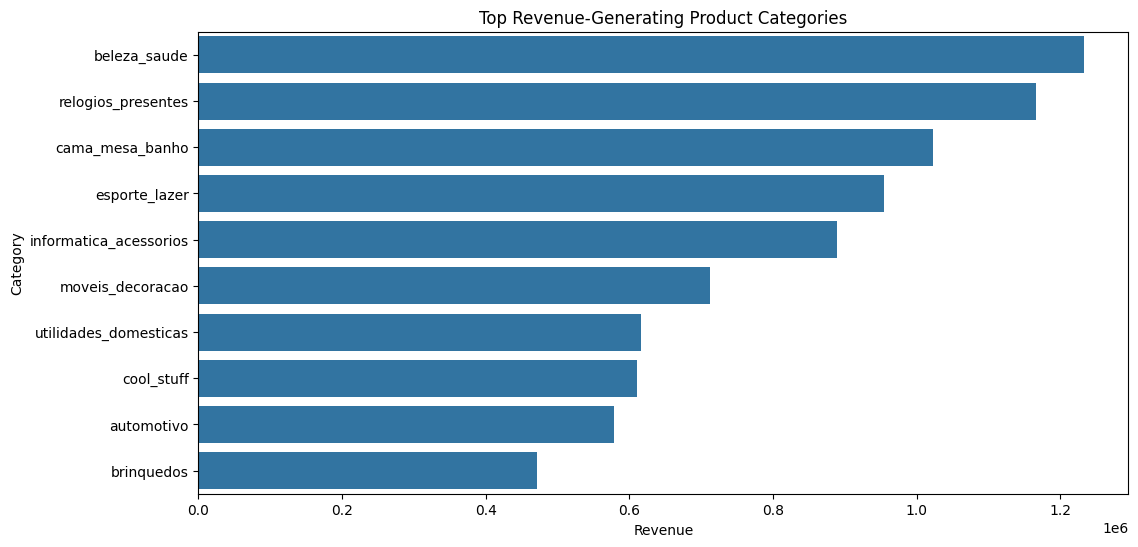

In [5]:
df_cat_rev = run_query("""
    SELECT 
        p.product_category_name,
        SUM(oi.price) AS total_revenue,
        COUNT(DISTINCT o.order_id) AS total_orders
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    WHERE o.order_status = 'delivered'
    GROUP BY p.product_category_name
    ORDER BY total_revenue DESC
    LIMIT 10;
""")

plt.figure(figsize=(12,6))
sns.barplot(x="total_revenue", y="product_category_name", data=df_cat_rev)
plt.title("Top Revenue-Generating Product Categories")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()


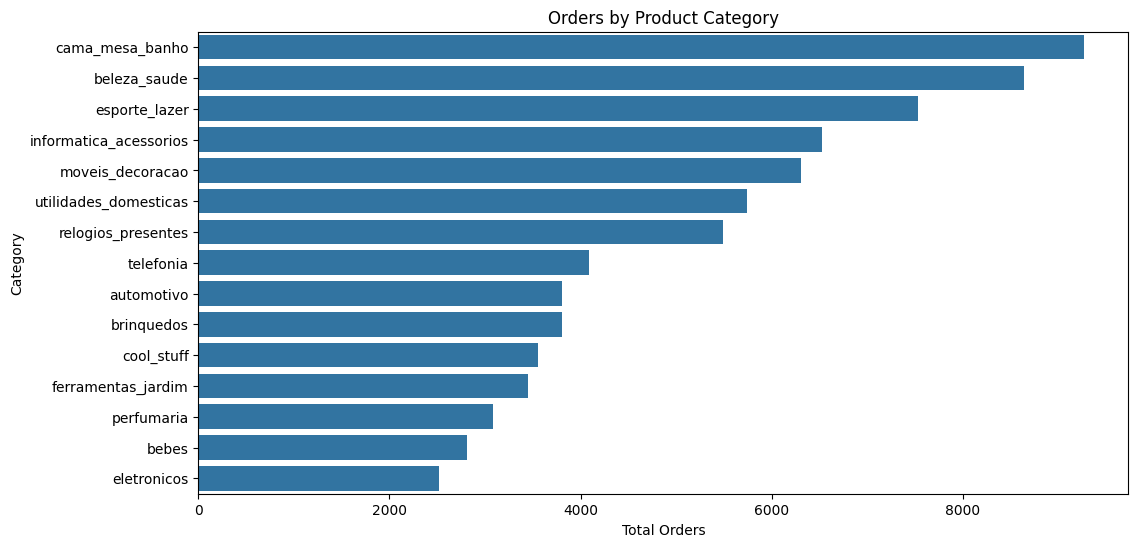

In [6]:
df_cat_orders = run_query("""
    SELECT 
        p.product_category_name,
        COUNT(DISTINCT o.order_id) AS total_orders
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    WHERE o.order_status = 'delivered'
    GROUP BY p.product_category_name
    ORDER BY total_orders DESC
    LIMIT 15;
""")

plt.figure(figsize=(12,6))
sns.barplot(x="total_orders", y="product_category_name", data=df_cat_orders)
plt.title("Orders by Product Category")
plt.xlabel("Total Orders")
plt.ylabel("Category")
plt.show()


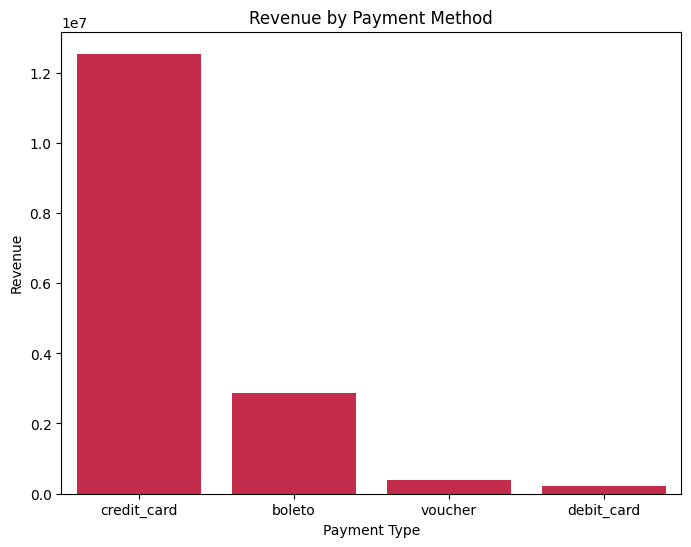

In [7]:
df_payment = run_query("""
    SELECT 
        payment_type,
        COUNT(*) AS total_transactions,
        SUM(payment_value) AS total_revenue,
        AVG(payment_value) AS avg_order_value
    FROM payments
    GROUP BY payment_type
    ORDER BY total_revenue DESC;
""")

plt.figure(figsize=(8,6))
sns.barplot(x="payment_type", y="total_revenue", data=df_payment,color='crimson')
plt.title("Revenue by Payment Method")
plt.ylabel("Revenue")
plt.xlabel("Payment Type")
plt.show()


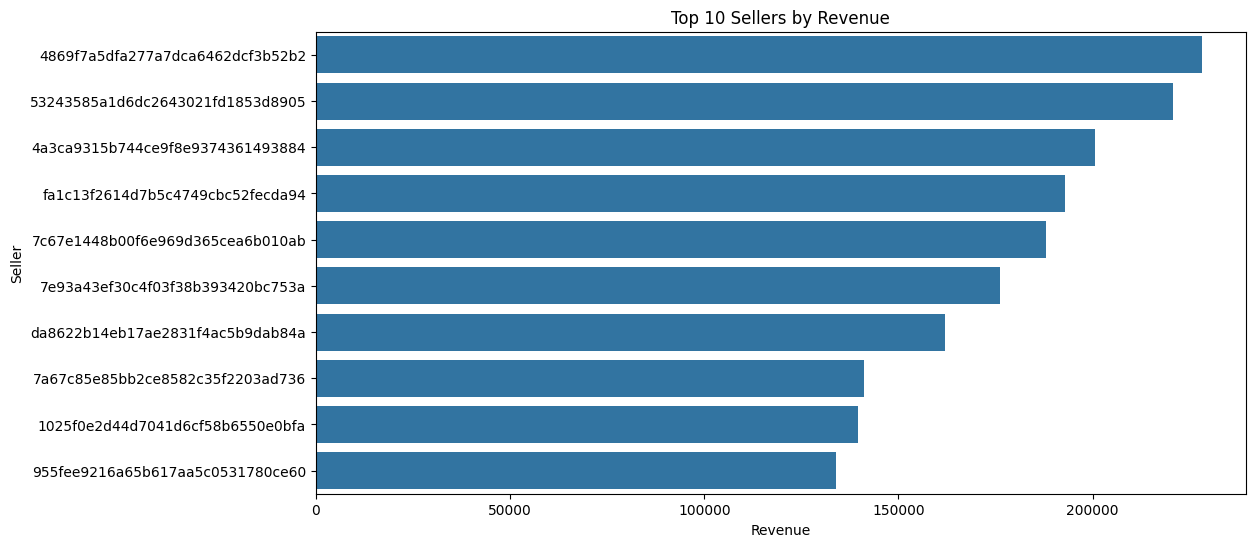

In [8]:
df_seller = run_query("""
    SELECT 
        oi.seller_id,
        COUNT(oi.order_id) AS total_orders,
        SUM(oi.price) AS total_revenue,
        AVG(r.review_score) AS average_review_score
    FROM order_items oi
    JOIN orders o ON oi.order_id = o.order_id
    JOIN reviews r ON o.order_id = r.order_id
    GROUP BY oi.seller_id
    ORDER BY total_revenue DESC
    LIMIT 10;
""")

plt.figure(figsize=(12,6))
sns.barplot(x="total_revenue", y="seller_id", data=df_seller)
plt.title("Top 10 Sellers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Seller")
plt.show()


  order_category  avg_installments  max_installments  total_orders
0      Low Value          2.716219                24         99619
1   Medium Value          5.877656                24          3106
2     High Value          6.583478                24          1150


C:\Users\SHWETA\AppData\Local\Temp\ipykernel_19972\3896530144.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = payment_df.groupby('order_category').agg(


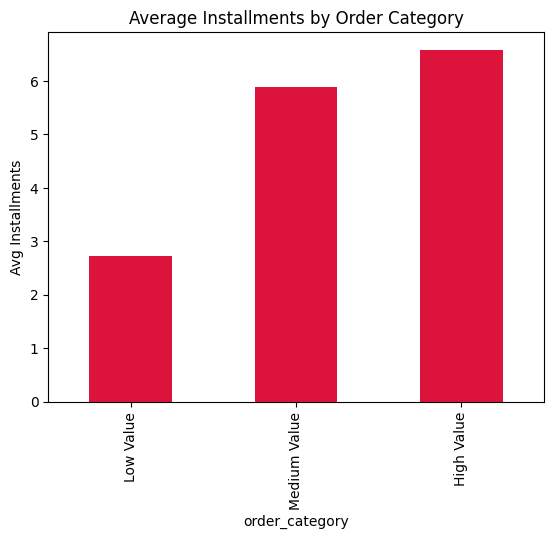

In [9]:
payment_df = run_query("""
SELECT 
    payment_value,
    payment_installments
FROM payments;
""")



# Categorize orders
payment_df['order_category'] = pd.cut(
    payment_df['payment_value'],
    bins=[0, 500, 1000, payment_df['payment_value'].max()],
    labels=['Low Value','Medium Value','High Value']
)

# Group & analyze
summary = payment_df.groupby('order_category').agg(
    avg_installments=('payment_installments','mean'),
    max_installments=('payment_installments','max'),
    total_orders=('payment_installments','count')
).reset_index()

print(summary)

# Plot
summary.plot(x='order_category', y='avg_installments', kind='bar', legend=False,color='crimson')
plt.title("Average Installments by Order Category")
plt.ylabel("Avg Installments")
plt.show()


   review_score  avg_delivery_days  total_reviews
0             1            21.2519           9409
1             2            16.6059           2941
2             3            14.2043           7962
3             4            12.2531          18987
4             5            10.6254          57060


Review-Delivery_time correlation: -0.9749361374309775


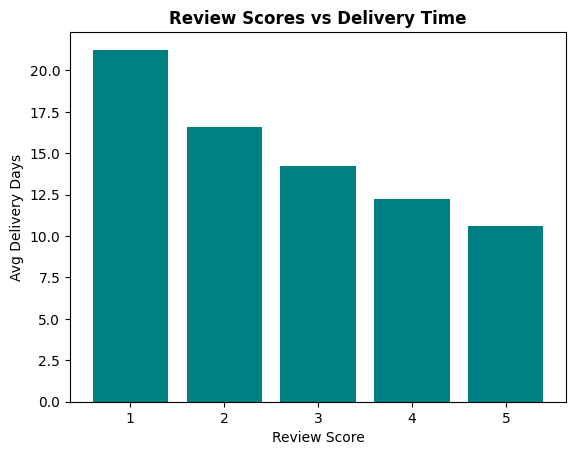

In [10]:
review_delivery_df = run_query(
    """SELECT 
    r.review_score,
    AVG(DATEDIFF(o.order_delivered_customer_date, o.order_purchase_timestamp)) AS avg_delivery_days,
    COUNT(*) AS total_reviews
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
WHERE o.order_delivered_customer_date IS NOT NULL
GROUP BY r.review_score
ORDER BY r.review_score;
"""
)
print(review_delivery_df)

rev_delv_corr = review_delivery_df['avg_delivery_days'].corr(review_delivery_df['review_score'])
print(f"\n\nReview-Delivery_time correlation: {rev_delv_corr}")

plt.bar(review_delivery_df['review_score'], review_delivery_df['avg_delivery_days'],color='teal')
plt.xlabel("Review Score")
plt.ylabel("Avg Delivery Days")
plt.title("Review Scores vs Delivery Time",fontweight='bold')
plt.show()



   review_score  avg_freight_cost  total_reviews
0             1             21.21          14235
1             2             20.94           3874
2             3             20.29           9423
3             4             20.05          21315
4             5             19.57          63525


 Average_freight_cost-review Correlation: -0.9910385366115722


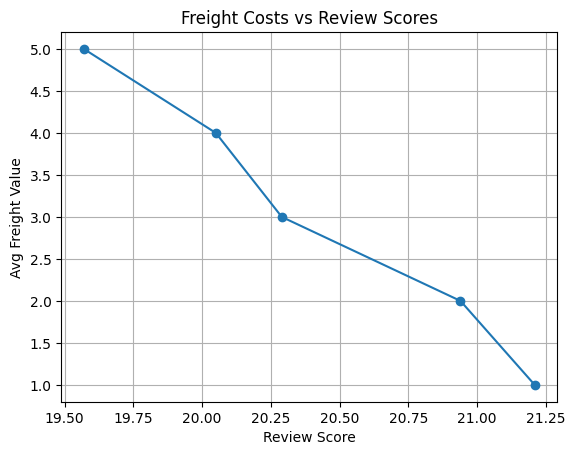

In [11]:
rev_frg_df = run_query(
    """SELECT 
    r.review_score,
    ROUND(AVG(p.freight_value),2) AS avg_freight_cost,
    COUNT(*) AS total_reviews
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN order_items p ON o.order_id = p.order_id
GROUP BY r.review_score
ORDER BY r.review_score;
"""
)

print(rev_frg_df)

rev_frg_corr = rev_frg_df['avg_freight_cost'].corr(rev_frg_df['review_score'])
print(f"\n\n Average_freight_cost-review Correlation: {rev_frg_corr}")


# Plot
plt.plot(rev_frg_df['avg_freight_cost'], rev_frg_df['review_score'], marker='o')
plt.xlabel("Review Score")
plt.ylabel("Avg Freight Value")
plt.title("Freight Costs vs Review Scores")
plt.grid(True)
plt.show()


In [12]:
print("Sellers with Consistently Bad Reviews:")
run_query(
    """SELECT 
    oi.seller_id,
    AVG(r.review_score) AS avg_review_score,
    COUNT(r.review_id) AS total_reviews
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY oi.seller_id
HAVING avg_review_score < 3 AND total_reviews > 50
ORDER BY avg_review_score ASC
LIMIT 10;
"""
)


Sellers with Consistently Bad Reviews:


,seller_id,avg_review_score,total_reviews
0,1ca7077d890b907f89be8c954a02686a,2.1985,136
1,2eb70248d66e0e3ef83659f71b244378,2.7129,209
2,602044f2c16190c2c6e45eb35c2e21cb,2.9322,59
3,54965bbe3e4f07ae045b90b0b8541f52,2.9383,81
4,a49928bcdf77c55c6d6e05e09a9b4ca5,2.9528,106
5,972d0f9cf61b499a4812cf0bfa3ad3c4,2.9643,84


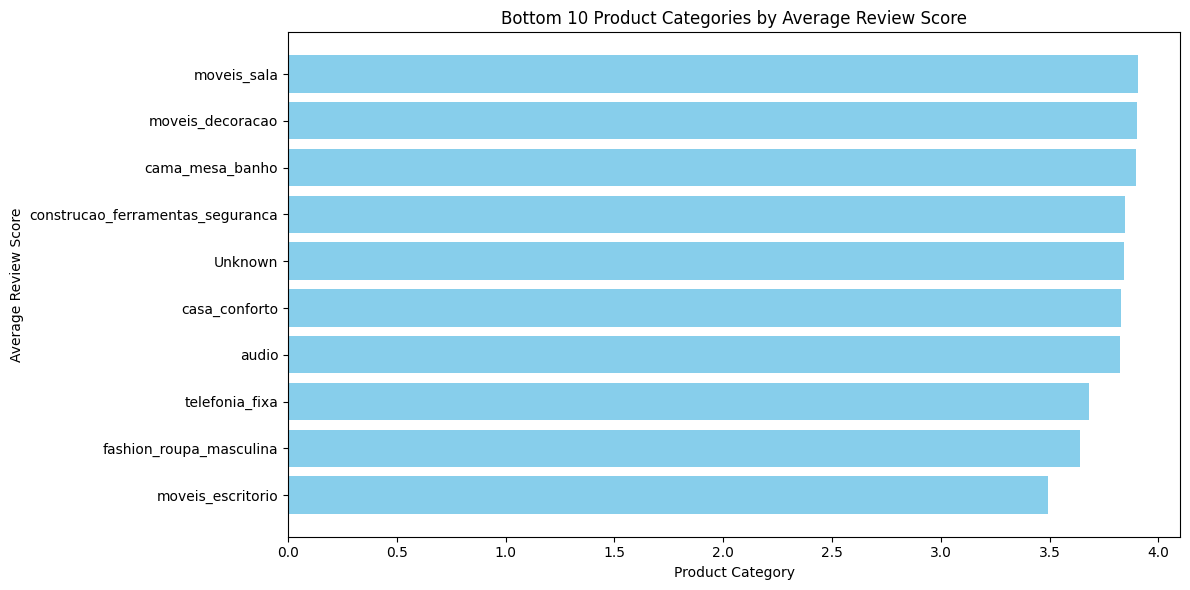

In [13]:
low_pref_cat = run_query(
    """SELECT 
    p.product_category_name,
    AVG(r.review_score) AS avg_review_score,
    COUNT(r.review_id) AS total_reviews
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
HAVING COUNT(r.review_id) > 50  -- only categories with enough data
ORDER BY avg_review_score ASC
LIMIT 10;
"""
)

low_pref_cat['product_category_name'] = low_pref_cat['product_category_name'].fillna("Unknown")


plt.figure(figsize=(12,6))  # wider figure for long names
plt.barh(low_pref_cat['product_category_name'], low_pref_cat['avg_review_score'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.title('Bottom 10 Product Categories by Average Review Score')
plt.tight_layout()  # prevent clipping of labels
plt.show()


In [14]:
df_cat_growth = run_query(
    """SELECT 
    p.product_category_name,
    YEAR(o.order_purchase_timestamp) AS order_year,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.price) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
WHERE o.order_status = 'delivered'
GROUP BY p.product_category_name, YEAR(o.order_purchase_timestamp)
ORDER BY revenue DESC;
"""
)
df_cat_growth


,product_category_name,order_year,total_orders,revenue
0,beleza_saude,2018,5305,755724.50
1,relogios_presentes,2018,3418,687855.20
2,cama_mesa_banho,2018,4844,532358.85
3,esporte_lazer,2018,3973,517166.26
4,informatica_acessorios,2018,3972,496269.30
...,...,...,...,...
171,None,2016,2,65.89
172,cds_dvds_musicais,2018,1,65.00
173,fashion_roupa_feminina,2016,1,54.90
174,fashion_calcados,2016,1,29.99


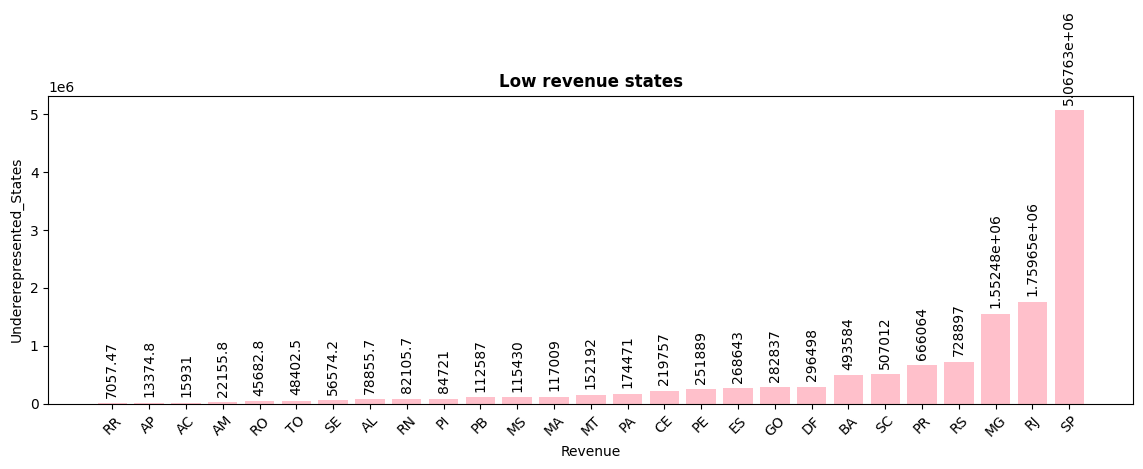

In [15]:
df_regions = run_query(
    """SELECT 
    c.customer_state,
    COUNT(DISTINCT o.customer_id) AS unique_customers,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.price) AS revenue

FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN customers c ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered'  
GROUP BY c.customer_state
ORDER BY revenue ASC;
"""
)
df_regions

underrepresented = df_regions[df_regions['revenue'] < df_regions['revenue'].quantile(.25)]
underrepresented

plt.figure(figsize=(14,4))
bars = plt.bar(df_regions['customer_state'],df_regions['revenue'],color='pink')
plt.bar_label(bars,rotation=90,padding=4)
plt.xlabel("Revenue")
plt.ylabel("Undererepresented_States")
plt.title("Low revenue states",fontweight= 'bold')
plt.xticks(rotation=45)
plt.show()

In [16]:
run_query(
    """SELECT 
    strftime('%%%Y-%%%m', o.order_purchase_timestamp) AS year_month,
    SUM(oi.price) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
WHERE o.order_status = 'delivered'
GROUP BY strftime('%%%Y-%%%m', o.order_purchase_timestamp)
ORDER BY year_month;
"""
)

Error: unsupported format character 'Y' (0x59) at index 25


   total_orders  late_orders  ontime_orders  late_percentage
0         96478       7826.0        88644.0             8.11


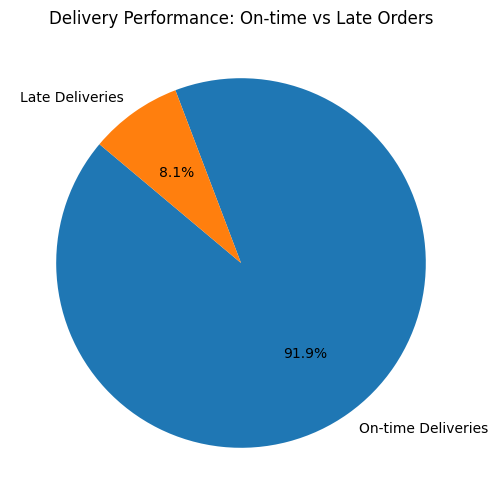

In [17]:
df_delivery = run_query("""
SELECT 
    COUNT(*) AS total_orders,
    SUM(CASE 
            WHEN o.order_delivered_customer_date > o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) AS late_orders,
    SUM(CASE 
            WHEN o.order_delivered_customer_date <= o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) AS ontime_orders,
    ROUND(SUM(CASE 
            WHEN o.order_delivered_customer_date > o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) / COUNT(*) * 100, 2) AS late_percentage
FROM orders o
WHERE o.order_status = 'delivered';
""")

print(df_delivery)

# Pie Chart Visualization


labels = ['On-time Deliveries', 'Late Deliveries']
sizes = [df_delivery['ontime_orders'][0], df_delivery['late_orders'][0]]


plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Delivery Performance: On-time vs Late Orders")
plt.show()


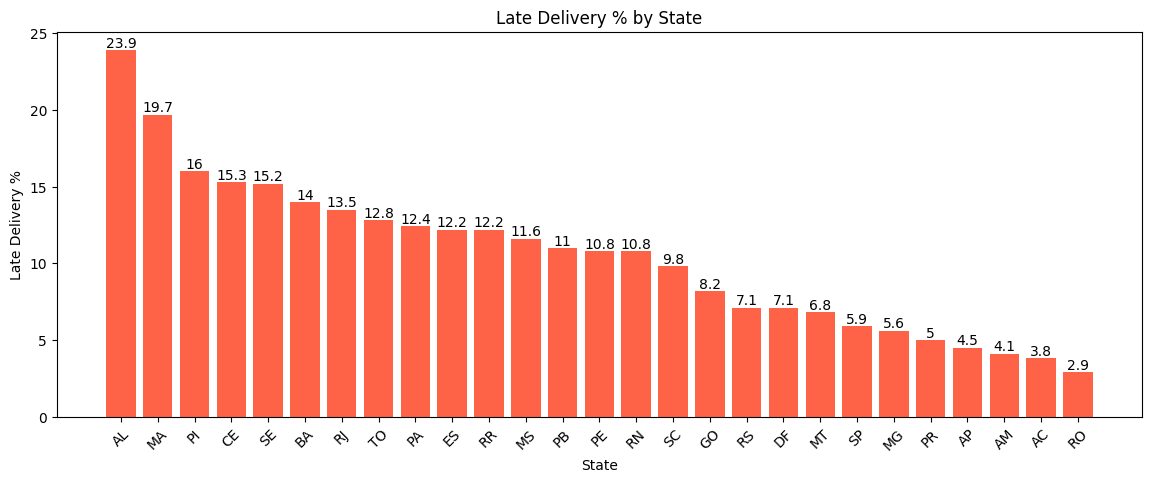

In [18]:
# Delivery Performance by State
df_state = run_query("""
SELECT 
    c.customer_state,
    COUNT(*) AS total_orders,
    SUM(CASE 
            WHEN o.order_delivered_customer_date > o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) AS late_orders,
    ROUND(SUM(CASE 
            WHEN o.order_delivered_customer_date > o.order_estimated_delivery_date 
            THEN 1 ELSE 0 
        END) / COUNT(*) * 100, 1) AS late_percentage
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered'
GROUP BY c.customer_state
ORDER BY late_percentage DESC;
""")

# Bar Plot

plt.figure(figsize=(14,5))
bars = plt.bar(df_state['customer_state'], df_state['late_percentage'], color='tomato')
plt.bar_label(bars)
plt.xticks(rotation=45)
plt.title("Late Delivery % by State")
plt.xlabel("State")
plt.ylabel("Late Delivery %")
plt.show()


C:\Users\SHWETA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


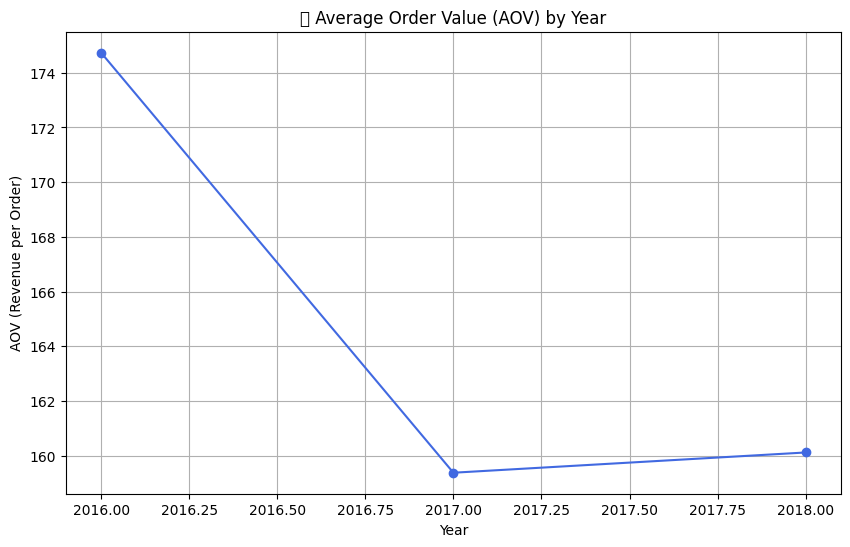

In [19]:
df_aov = run_query("""
    SELECT 
        YEAR(o.order_purchase_timestamp) AS order_year,
        ROUND(SUM(oi.price + oi.freight_value),2) AS total_revenue,
        COUNT(DISTINCT o.order_id) AS total_orders,
        ROUND(SUM(oi.price + oi.freight_value) / COUNT(DISTINCT o.order_id), 2) AS avg_order_value
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY YEAR(o.order_purchase_timestamp)
    ORDER BY order_year;
""")

# Plot AOV over time
plt.figure(figsize=(10,6))
plt.plot(df_aov['order_year'], df_aov['avg_order_value'], marker='o', color='royalblue')
plt.title("💰 Average Order Value (AOV) by Year")
plt.xlabel("Year")
plt.ylabel("AOV (Revenue per Order)")
plt.grid(True)
plt.show()


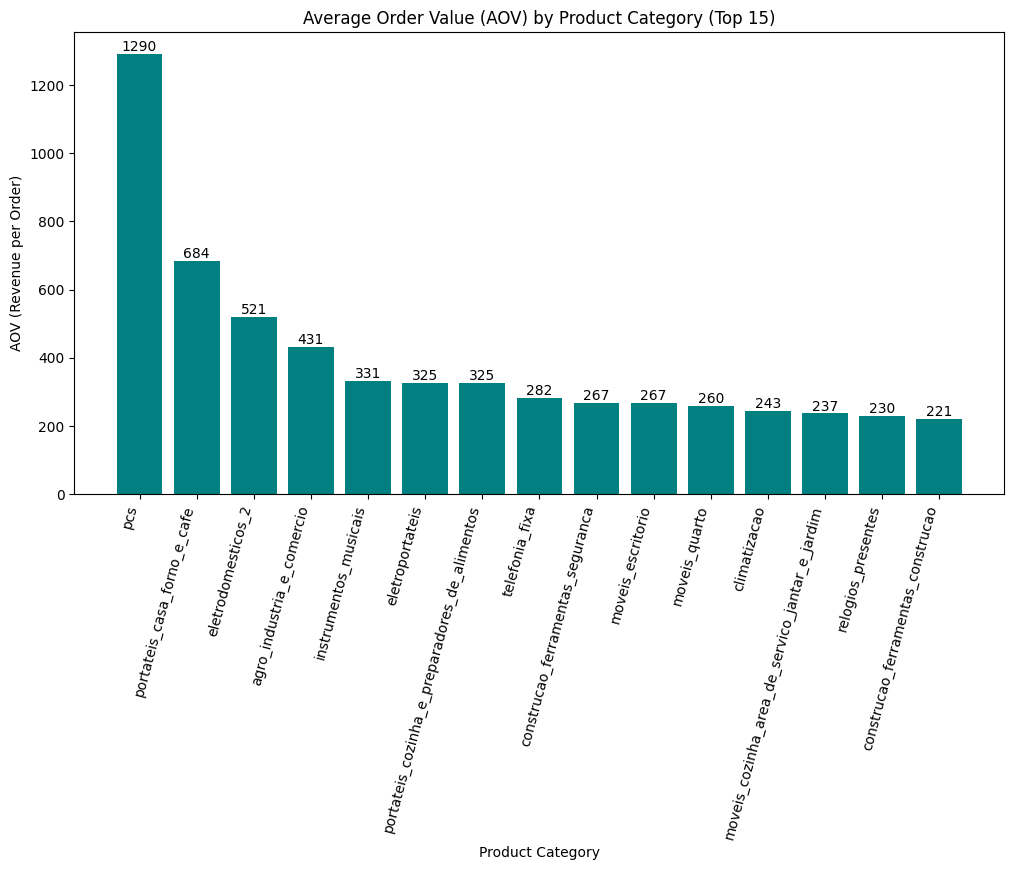

In [20]:
df_aov_cat = run_query("""
    SELECT 
        p.product_category_name,
        ROUND(SUM(oi.price + oi.freight_value), 2) AS total_revenue,
        COUNT(DISTINCT o.order_id) AS total_orders,
        ROUND(SUM(oi.price + oi.freight_value) / COUNT(DISTINCT o.order_id), 2) AS avg_order_value
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    WHERE o.order_status = 'delivered'
    GROUP BY p.product_category_name
    ORDER BY avg_order_value DESC
    LIMIT 15;
""")

# Plot AOV by category
plt.figure(figsize=(12,6))
bars = plt.bar(df_aov_cat['product_category_name'], df_aov_cat['avg_order_value'], color="teal")
plt.xticks(rotation=75, ha="right")
plt.title("Average Order Value (AOV) by Product Category (Top 15)")
plt.xlabel("Product Category")
plt.ylabel("AOV (Revenue per Order)")

# Add values on bars
plt.bar_label(bars, fmt="%.0f")
plt.show()


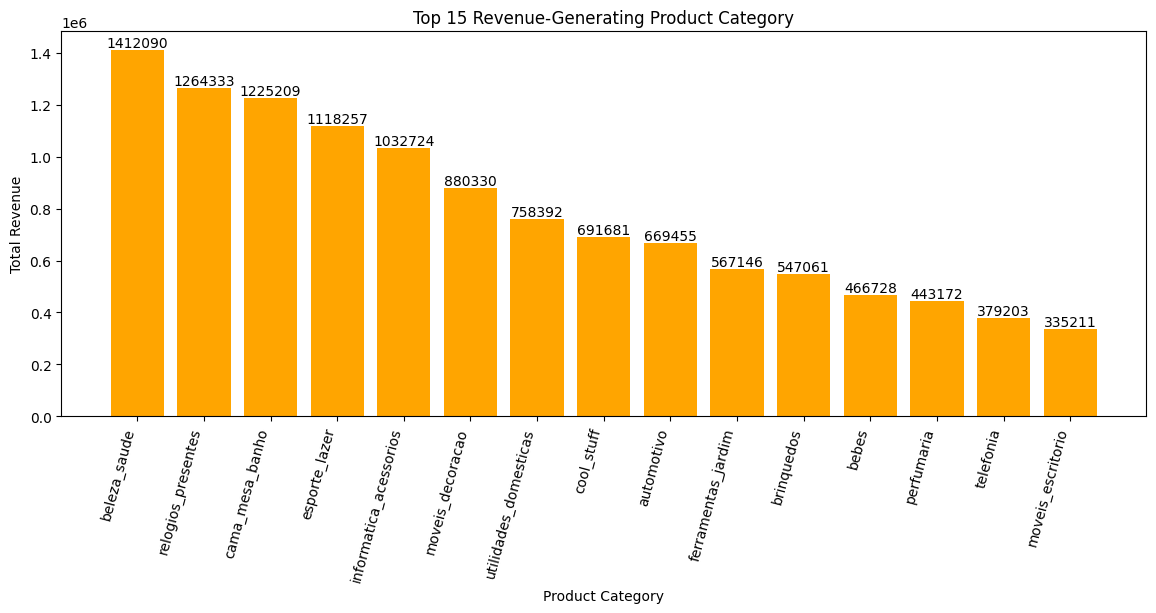

In [21]:
df_top_products = run_query("""
    SELECT 
        p.product_category_name,
        ROUND(SUM(oi.price + oi.freight_value), 2) AS total_revenue,
        COUNT(DISTINCT oi.order_id) AS total_orders
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    JOIN orders o ON oi.order_id = o.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY p.product_category_name
    ORDER BY total_revenue DESC
    LIMIT 15;
""")

# Plot top products by revenue
plt.figure(figsize=(14,5))
bars = plt.bar(df_top_products['product_category_name'], df_top_products['total_revenue'], color="orange")
plt.xticks(rotation=75, ha="right")
plt.title("Top 15 Revenue-Generating Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")

# Add labels
plt.bar_label(bars, fmt="%.0f")
plt.show()


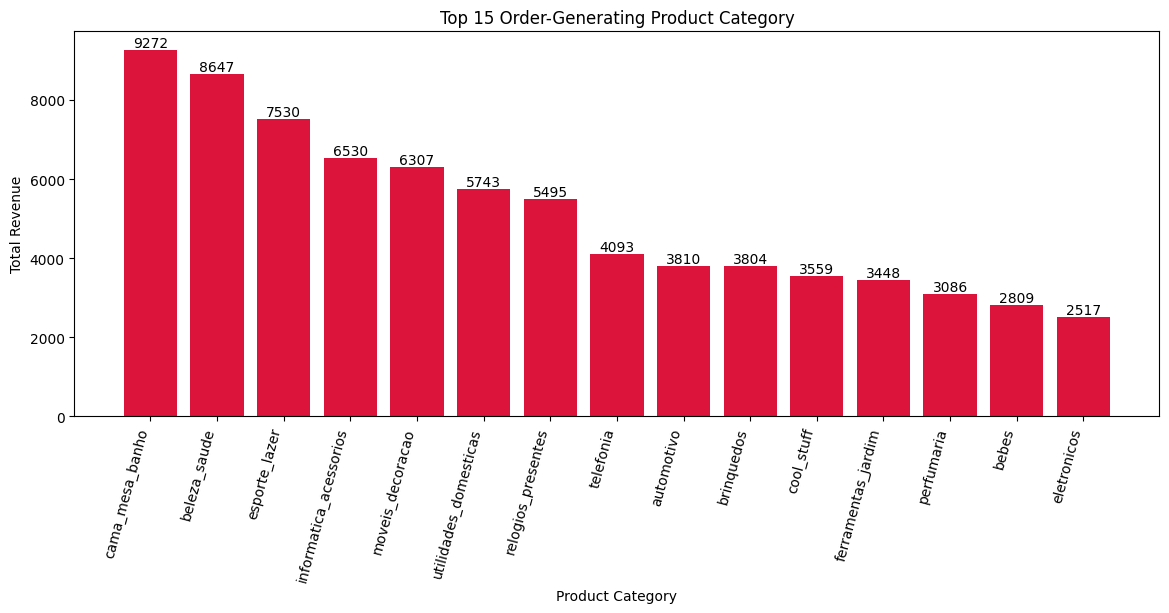

In [22]:
df_top_orders_prod = run_query("""
    SELECT 
        p.product_category_name,
        ROUND(SUM(oi.price + oi.freight_value), 2) AS total_revenue,
        COUNT(DISTINCT oi.order_id) AS total_orders
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    JOIN orders o ON oi.order_id = o.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY p.product_category_name
    ORDER BY total_orders DESC
    LIMIT 15;
""")

# Plot top products by revenue
plt.figure(figsize=(14,5))
bars = plt.bar(df_top_orders_prod['product_category_name'], df_top_orders_prod['total_orders'], color="crimson")
plt.xticks(rotation=75, ha="right")
plt.title("Top 15 Order-Generating Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")

# Add labels
plt.bar_label(bars, fmt="%.0f")
plt.show()


In [ ]:
run_query("""WITH customer_orders AS (
    SELECT 
        c.customer_unique_id,
        COUNT(o.order_id) AS total_orders
    FROM orders o
    JOIN customers c 
      ON o.customer_id = c.customer_id
    GROUP BY c.customer_unique_id
)
SELECT 
    COUNT(*) AS total_customers,
    SUM(CASE WHEN total_orders = 1 THEN 1 ELSE 0 END) AS one_time_customers,
    SUM(CASE WHEN total_orders > 1 THEN 1 ELSE 0 END) AS repeat_customers,
    ROUND(SUM(CASE WHEN total_orders > 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) 
      AS repeat_customer_percentage
FROM customer_orders;
""")

,total_customers,one_time_customers,repeat_customers,repeat_customer_percentage
0,96096,93099.0,2997.0,3.12
